# Procesamiento de datos numéricos

Las medidas de tendencia central y de dispersión, junto con las visualizaciones nos ayudan a entender el comportamiento de la data. Una vez hecho ese análisis exploratorio, podemos realizar un procesamiento de datos para ingresarlos a algoritmos de Machine Learning, el pipeline o flujo de trabajo es el siguiente:
- **Escalamiento lineal (Normalización):** Los modelos de machine learning son más eficientes si los datos tienen el mismo rango de dimensiones, entre [-1,1], ya que es más eficiente computacionalmente y a todos les da la misma importancia. El escalamiento entonces es una transformación lineal que lleva todos los datos a un intervalo entre -1 y 1. Hay diferentes tipos:
    - Min-Max: Dado una serie de datos x, se hace la sig. transformación:
    $$ x \longrightarrow x_s; \qquad x_s = \dfrac{2x-min-max}{max-min}$$
    - Clipping: Nos quedamos con los datos dentro del IQR y los que estan afuera los colapsamos a cuantiles $Q_1$ o $Q_3$. No es muy recomendado ya que omite de forma brusca los outliers.
    - Z-score: Normalización que permite que la data se transforme a una distribución normal estandar, con $\mu = 1$ y $\sigma = 0$:
    $$ x \longrightarrow x_s; \qquad x_s = \dfrac{x-\mu}{\sigma}$$

- **Transformación no lineal:** Cuando los datos no tienen una distribución simétrica, les aplicamos una transformación no lineal para hacer la data simétrica y homogénea. Algunas transformaciones son:
    - $y = tanh(x/a)$: Ya que el rango de esta función es [-1,1]. El parámetro a se calibra para obtener una mejor simetría
    - $y = \sqrt{x}$: Su rango es de [0,1], por lo que sirve para normalizar también.
    - $y = \dfrac{1}{1-e^{-x}}$. Es la función sigmoide y su rango es de [0,1]. También es una de las más usadas.



In [1]:
import timeit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

X,y = datasets.load_diabetes(return_X_y=True) #descargamos el dataset sobre pacientes con diabetes
raw = X[:, None,2] #realizamos una transfomación a la data para poder trabajar con ella

Más detalles del dataset en: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html

A continuación visualizamos los datos:

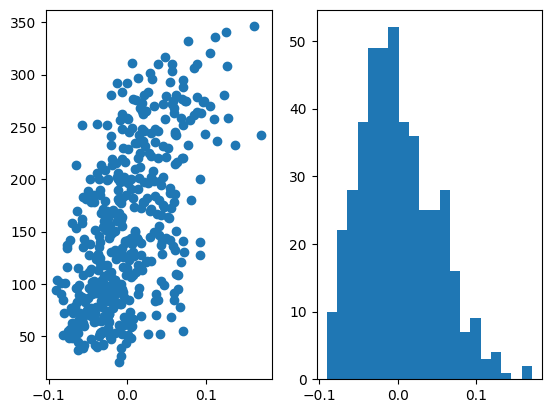

In [26]:
fig, axs = plt.subplots(1,2)
axs[0].scatter(raw,y)
axs[1].hist(raw, bins = 20)
plt.show()

Hacemos escalamiento lineal:

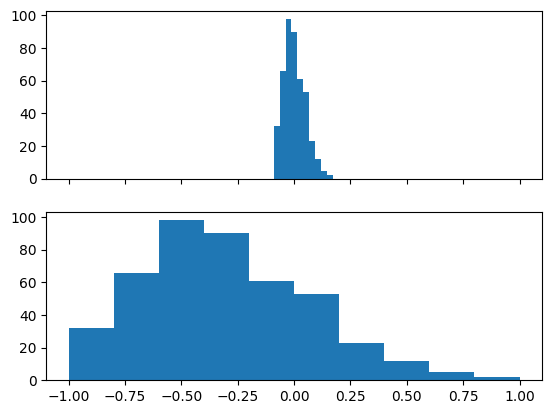

In [61]:
# Escalamiento max-min
max_raw = max(raw)
min_raw = min(raw)

scaled_max_min = (2*raw - max_raw - min_raw)/(max_raw - min_raw)

#visualizamos la data original (arriba) y la data transformada (abajo)
fig, axs = plt.subplots(2,1, sharex = True)
axs[0].hist(raw)
axs[1].hist(scaled_max_min)
plt.show()

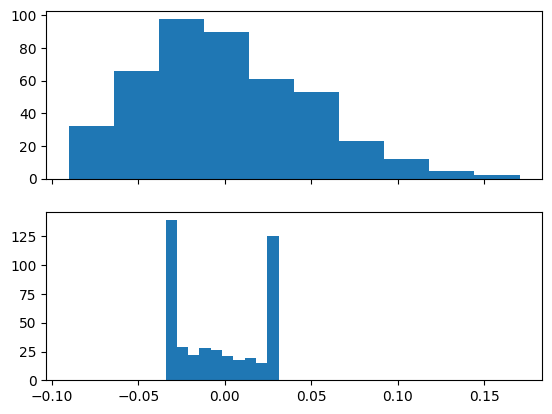

In [79]:
# Escalamiento clipping

Q1_raw = np.quantile(raw, q=0.25)
Q3_raw = np.quantile(raw, q=0.75)

def clipping(data, Q1, Q3):
    data = raw.reshape(len(data),)
    lista = []

    for i in range(len(data)):
        if data[i] <= Q1:
            lista.append(Q1)
        elif data[i] >= Q3:
            lista.append(Q3)
        else:
            lista.append(data[i])
            
    escalamiento = np.array(lista)
    escalamiento = escalamiento.reshape(len(escalamiento), 1)
    return escalamiento

scaled_clipping = clipping(raw, Q1_raw, Q3_raw )

#visualizamos la data original (arriba) y la data transformada (abajo)
fig, axs = plt.subplots(2,1, sharex = True)
axs[0].hist(raw)
axs[1].hist(scaled_clipping)
plt.show()

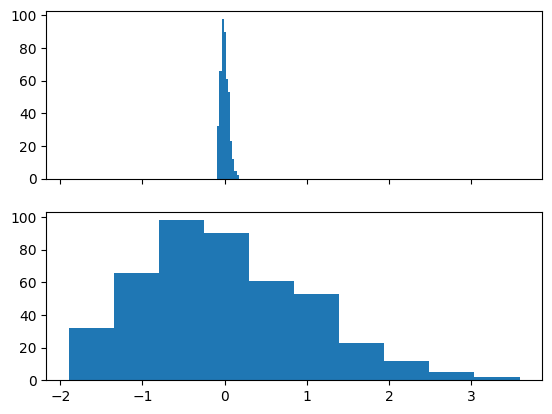

In [80]:
# Escalamiento Z-score


scaled_z_score = (raw - np.mean(raw))/np.std(raw)

#visualizamos la data original (arriba) y la data transformada (abajo)
fig, axs = plt.subplots(2,1, sharex = True)
axs[0].hist(raw)
axs[1].hist(scaled_z_score)
plt.show()

In [81]:
# Si aplicamos un modelo de Machine Learning
def train_raw():
    linear_model.LinearRegression().fit(raw,y)

def train_max_min():
    linear_model.LinearRegression().fit(scaled_max_min,y)

def train_clipping():
    linear_model.LinearRegression().fit(scaled_clipping,y)


def train_z_score():
    linear_model.LinearRegression().fit(scaled_z_score,y)

In [84]:
#promediamos el tiempo de ejecución de 100 intentos
raw_time = timeit.timeit(train_raw, number = 100)
scaled_max_min_time = timeit.timeit(train_max_min, number = 100)
scaled_clipping_time = timeit.timeit(train_clipping, number = 100)
scaled_z_score_time = timeit.timeit(train_z_score, number = 100)

print('train raw : {}'.format(raw_time))
print('train max_min scaled : {}'.format(scaled_max_min_time))
print('train clipping scaled : {}'.format(scaled_clipping_time))
print('train zscore scaled : {}'.format(scaled_z_score_time))

train raw : 0.20873185900018143
train max_min scaled : 0.08791350299998157
train clipping scaled : 0.09490897900013806
train zscore scaled : 0.13156866299959802


Observamos que el más rapido fue el escalado max_min, que pese a que no es mucha la diferencia. Cuando trabajemos con algoritmos más complejos y muchos más datos será de importancia el uso de las transformaciones.